In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("E:\徐强\俱乐部学习和任务\linear_regression(2)\ex1data2.csv",names=['面积','房间个数','价格'])
data.head()

,面积,房间个数,价格
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


可以特征归一化，消除特征值之间量纲的影响，提高收敛速度，提升模型精度

In [3]:
def normalize_feature(data):
    return (data - data.mean()) / data.std()


In [4]:
data = normalize_feature(data)

In [5]:
data.head()

,面积,房间个数,价格
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


构造数据集

In [6]:
data.insert(0,'ones',1)
data.head()

,ones,面积,房间个数,价格
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [7]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [8]:
X = X.values
y = y.values
print(X.shape)
print(y.shape)

(47, 3)
(47,)


In [9]:
y = y.reshape(47,1)
print(y.shape)

(47, 1)


定义损失函数

In [10]:
def cost_funcation(X,y,theta):
    inner = np.power(X @ theta - y,2)
    return sum(inner) / (2*len(X))


In [11]:
theta = np.zeros((3,1))
theta.shape

(3, 1)

In [12]:
cost_show = cost_funcation(X,y,theta)
print(cost_show)

[0.4893617]


反向传播代码

In [13]:
def BP(X,y,theta,alpha,times,isprint = False):
    costs = []

    for i in range(times):
        theta = theta -  (X.T @ (X @ theta - y)) * alpha / len(X)
        cost = cost_funcation(X,y,theta)
        costs.append(cost)
    if times % 100 == 0:
        if isprint:
            print(costs)
    return theta,costs


In [14]:
alphas = [0.000003,0.00003,0.0003,0.003,0.03]
times = 2000


[Text(0.5, 0, 'times'),
 Text(0, 0.5, 'costs'),
 Text(0.5, 1.0, 'costs and times')]

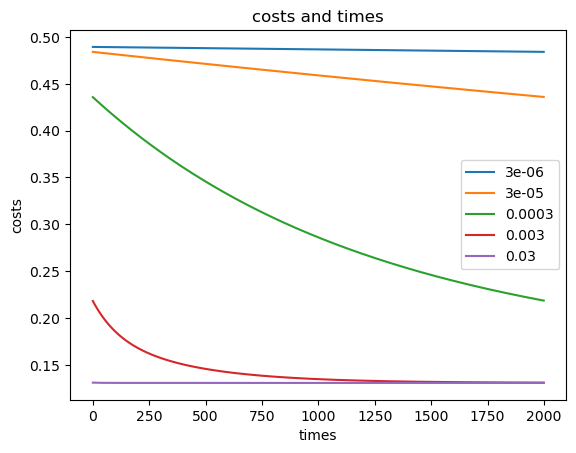

In [15]:
fig,pic = plt.subplots()
for alpha in alphas:
    theta,costs = BP(X,y,theta,alpha,times)
    pic.plot(np.arange(times),costs,label = alpha)
    pic.legend()

pic.set(xlabel='times',ylabel='costs',title='costs and times')
